#### Alura Store Challenge

##### Este notebook apresenta uma análise detalhada dos dados de vendas da Alura Store, abrangendo diversas métricas e visualizações para facilitar a compreensão do desempenho das lojas. A seguir, estão os principais tópicos abordados:

1. **Obtenção e Alocação da Base de Dados**: Importação das bibliotecas necessárias e carregamento dos dados de vendas de quatro lojas diferentes.

2. **Faturamento Total**: Cálculo e visualização do faturamento total de cada loja por meio de gráficos de barras.

3. **Vendas por Categoria de Produto**: Análise da quantidade de vendas por categoria de produto para cada loja individualmente, com gráficos de barras para melhor visualização.

4. **Número de Vendas Total por Categoria - Todas as Lojas**: Comparação das vendas por categoria entre todas as lojas utilizando gráficos de barras agrupadas.

5. **Satisfação Média com Atendimento**: Avaliação da satisfação média dos clientes por loja, representada em um gráfico de pontos.

6. **Produtos Mais e Menos Vendidos**: Identificação dos produtos mais e menos vendidos em cada loja, com destaque visual em gráficos de barras.

7. **Frete Médio**: Análise do custo médio de frete por loja, apresentada em gráficos de barras.

8. **Análise Geográfica**: Visualização da distribuição geográfica das vendas de cada loja com base em coordenadas de latitude e longitude.

##### Este notebook combina técnicas de análise de dados e visualização para fornecer insights valiosos sobre o desempenho das lojas da Alura Store.

#### Obteção e alocação da Base de Dados

In [1]:
#Importação de Bibliotecas Necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importação da base de dados de cada loja
data_loja1 = pd.read_csv('loja_1.csv')
data_loja2 = pd.read_csv('loja_2.csv')
data_loja3 = pd.read_csv('loja_3.csv')
data_loja4 = pd.read_csv('loja_4.csv')
data_loja1

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


#### Faturamento Total

In [3]:
faturamentos = []
faturamentos.append(data_loja1['Preço'].sum())
faturamentos.append(data_loja2['Preço'].sum())
faturamentos.append(data_loja3['Preço'].sum())
faturamentos.append(data_loja4['Preço'].sum())
faturamentos


[1534509.12, 1488459.06, 1464025.03, 1384497.58]

In [4]:
colors = ['#a6cee3', '#ffb347', '#b2df8a', '#ff9999'] 

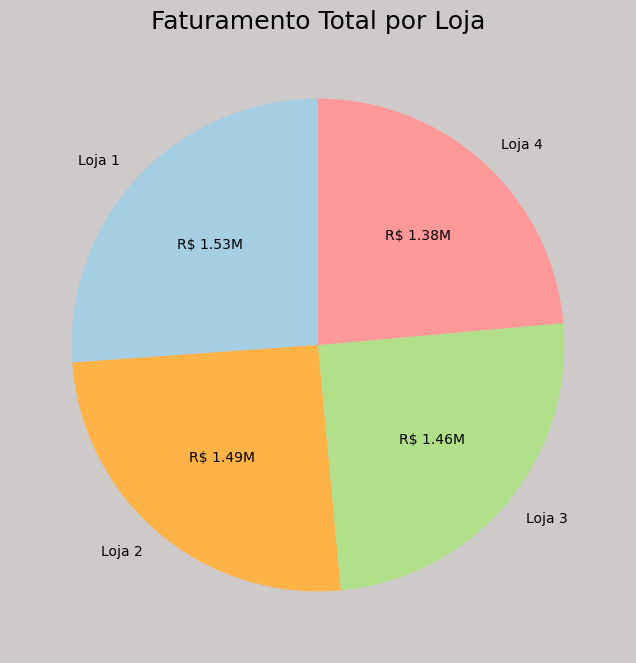

In [32]:
# Gráfico de Pizza - Faturamento Total por Loja
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor("#cecaca") 
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

ax.pie(faturamentos, labels=labels, autopct= lambda x : 'R$ {:.2f}M'.format(x*sum(faturamentos) / 1e8), colors=colors , startangle=90)
plt.title('Faturamento Total por Loja',fontsize =18 )
plt.show()

#### Vendas Por Categoria de Produto

##### Preparação Dados

In [6]:
cat_1 = data_loja1['Categoria do Produto'].value_counts()
cat_2 = data_loja2['Categoria do Produto'].value_counts()
cat_3 = data_loja3['Categoria do Produto'].value_counts()
cat_4 = data_loja4['Categoria do Produto'].value_counts()

##### Loja 1

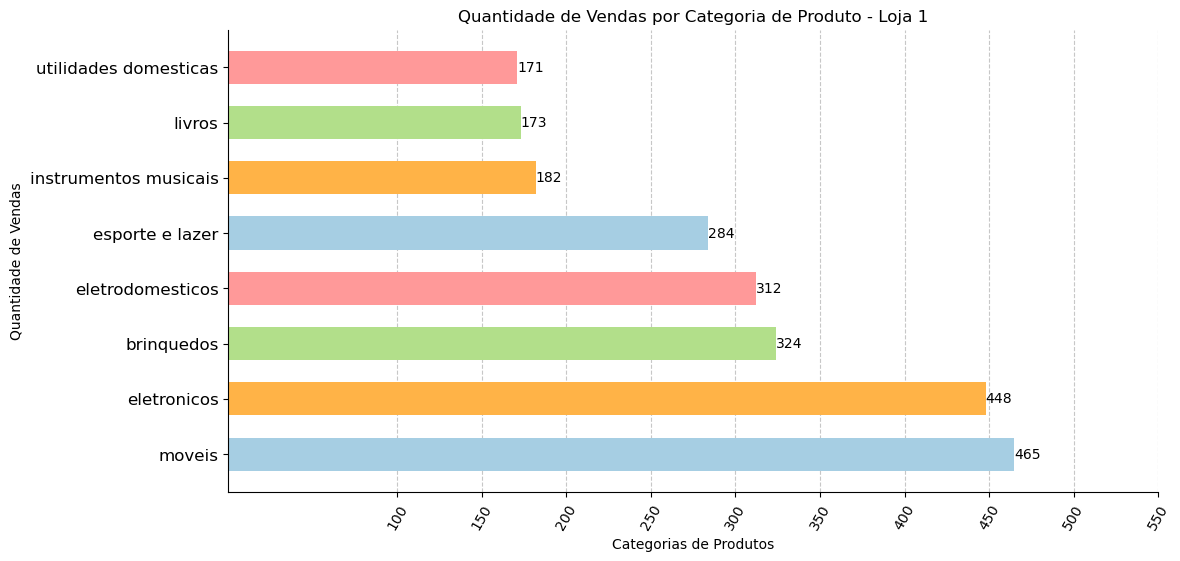

In [33]:
#Gráfico de Barras
fig,ax = plt.subplots(figsize=(12, 6))
p = ax.barh(cat_1.index, cat_1.values, 0.6,color=colors,zorder = 2)

#Adicionando os valores em cima das barras
ax.bar_label(p,label_type='edge', fontsize=10)

# Adicionando o título e os rótulos
plt.title('Quantidade de Vendas por Categoria de Produto - Loja 1')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Vendas')
ax.yaxis.set_tick_params(labelsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder= 0)
plt.xticks(range(100,600,50),rotation=60)
plt.show()

##### Loja 2


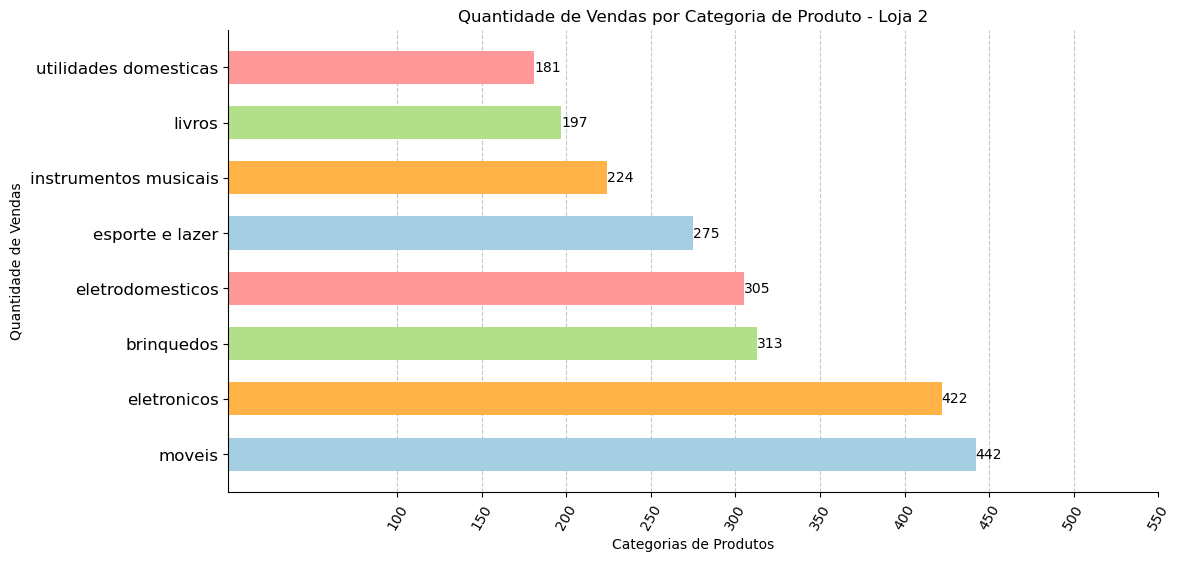

In [34]:
#Gráfico de Barras
fig,ax = plt.subplots(figsize=(12, 6))
p = ax.barh(cat_2.index, cat_2.values, 0.6,color=colors,zorder = 2)

#Adicionando os valores em cima das barras
ax.bar_label(p,label_type='edge', fontsize=10)

# Adicionando o título e os rótulos
plt.title('Quantidade de Vendas por Categoria de Produto - Loja 2')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Vendas')
ax.yaxis.set_tick_params(labelsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder= 0)
plt.xticks(range(100,600,50),rotation=60)
plt.show()

##### Loja 3

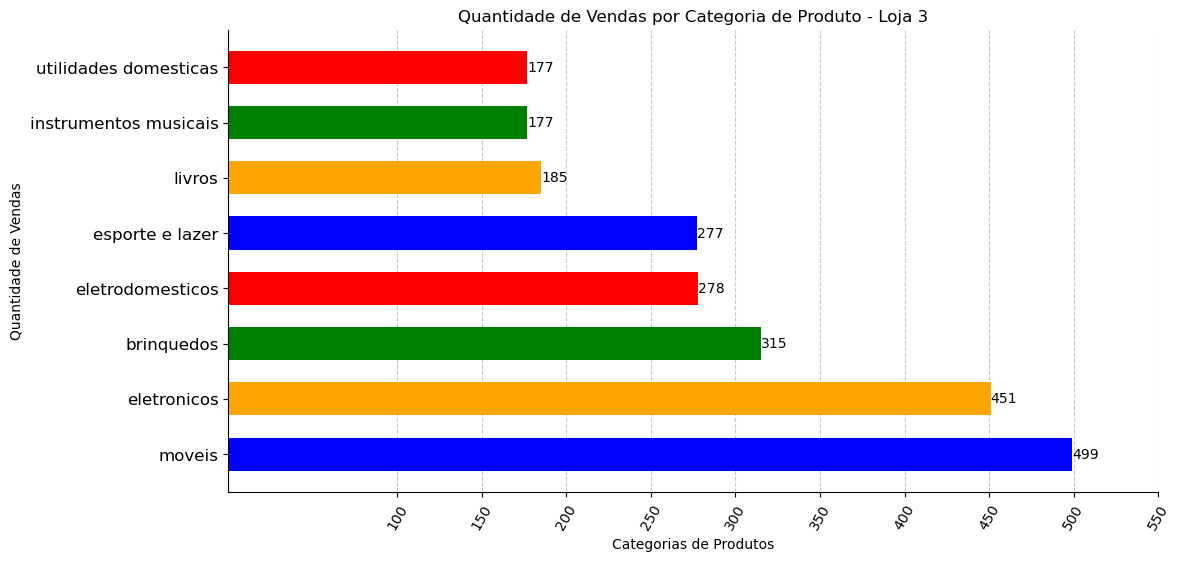

In [ ]:
#Gráfico de Barras
fig,ax = plt.subplots(figsize=(12, 6))
p = ax.barh(cat_3.index, cat_3.values, 0.6,color=colors,zorder = 2)

#Adicionando os valores em cima das barras
ax.bar_label(p,label_type='edge', fontsize=10)

# Adicionando o título e os rótulos
plt.title('Quantidade de Vendas por Categoria de Produto - Loja 3')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Vendas')
ax.yaxis.set_tick_params(labelsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder= 0)
plt.xticks(range(100,600,50),rotation=60)
plt.show()

##### Loja 4

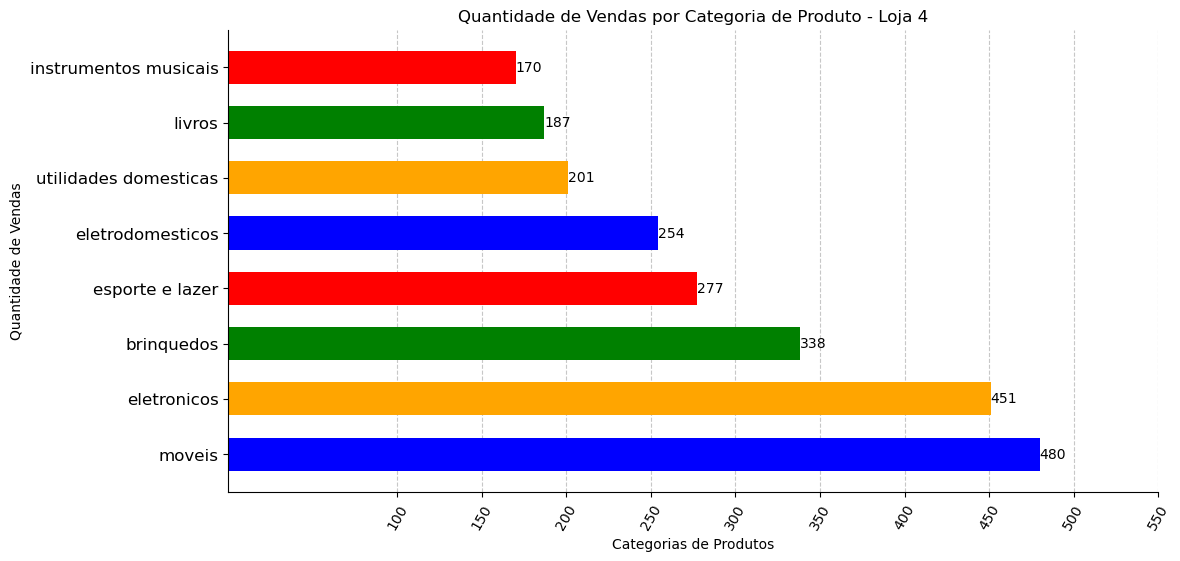

In [ ]:
#Gráfico de Barras
fig,ax = plt.subplots(figsize=(12, 6))
p = ax.barh(cat_4.index, cat_4.values, 0.6,color=colors,zorder = 2)

#Adicionando os valores em cima das barras
ax.bar_label(p,label_type='edge', fontsize=10)

# Adicionando o título e os rótulos
plt.title('Quantidade de Vendas por Categoria de Produto - Loja 4')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade de Vendas')
ax.yaxis.set_tick_params(labelsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder= 0)
plt.xticks(range(100,600,50),rotation=60)
plt.show()

##### Todas as Lojas

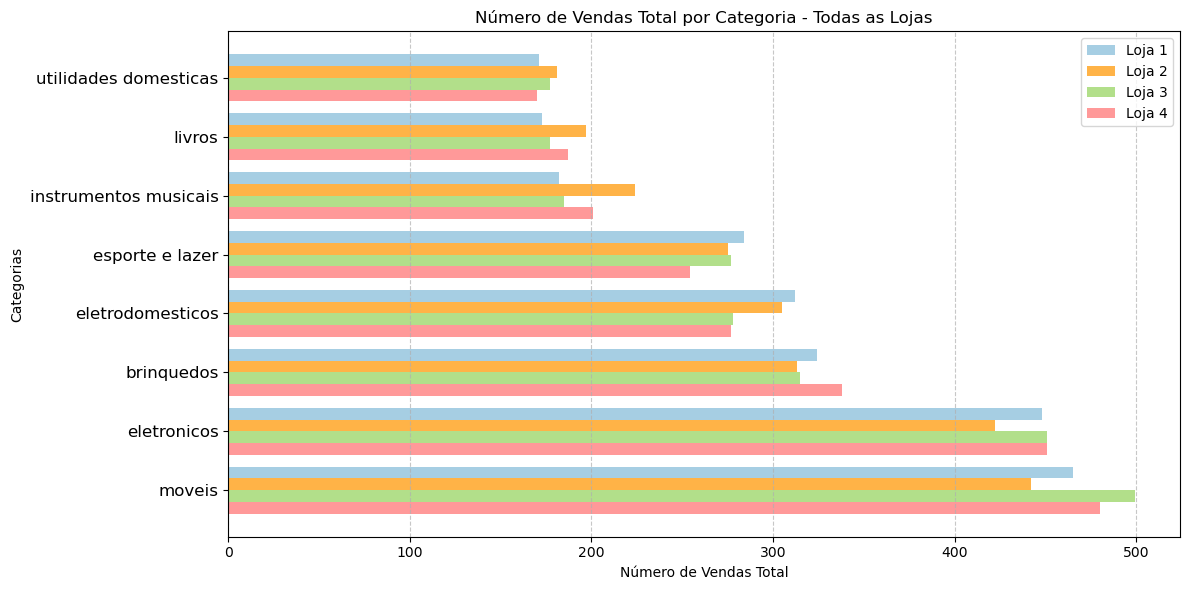

In [36]:
# Gráfico de Barras Horizontais Agrupadas - Vendas por Categoria em Todas as Lojas
fig, ax = plt.subplots(figsize=(12, 6))

barHeight = 0.2
y_pos = np.arange(len(cat_1.index))

ax.barh(y_pos + 1.5*barHeight, cat_1.values, height=barHeight, color=colors[0], label='Loja 1')
ax.barh(y_pos + 0.5*barHeight, cat_2.values, height=barHeight, color=colors[1], label='Loja 2')
ax.barh(y_pos - 0.5*barHeight, cat_3.values, height=barHeight, color=colors[2], label='Loja 3')
ax.barh(y_pos - 1.5*barHeight, cat_4.values, height=barHeight, color=colors[3], label='Loja 4')

ax.set_yticks(y_pos)
ax.set_yticklabels(cat_1.index, fontsize=12)
ax.set_xlabel('Número de Vendas Total')
ax.set_ylabel('Categorias')
ax.set_title('Número de Vendas Total por Categoria - Todas as Lojas')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()

#### Satisfação Média com Atendimento

In [13]:
satisfacao = []
satisfacao.append(data_loja1['Avaliação da compra'].mean())
satisfacao.append(data_loja2['Avaliação da compra'].mean())
satisfacao.append(data_loja3['Avaliação da compra'].mean())
satisfacao.append(data_loja4['Avaliação da compra'].mean())


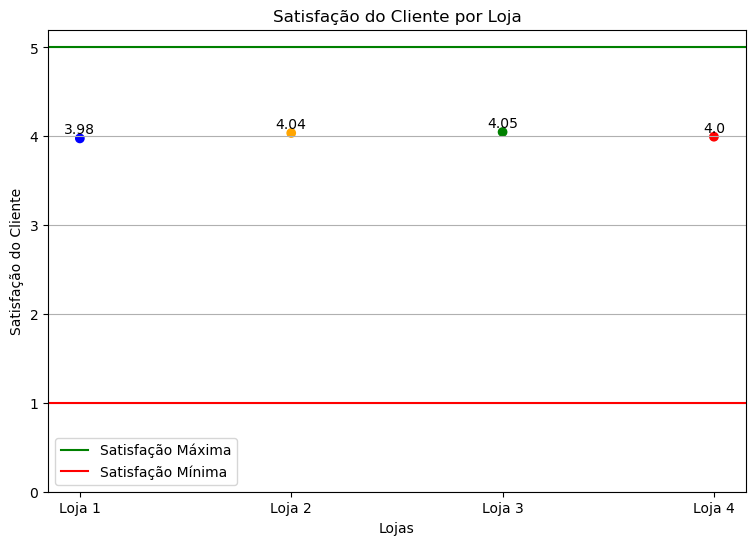

In [14]:
#Gráfico Ponto
plt.figure(figsize=(9, 6))
plt.scatter(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], satisfacao,color=colors ,marker='o')
plt.xticks(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])
plt.ylim(0, 5.2)
plt.title('Satisfação do Cliente por Loja')
plt.xlabel('Lojas')
plt.ylabel('Satisfação do Cliente')
plt.grid(axis='y')

for i,v in enumerate(satisfacao):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.axhline(y=5, color='g', linestyle='-', label='Satisfação Máxima')
plt.axhline(y=1, color='r', linestyle='-', label='Satisfação Mínima')
plt.legend()
plt.show()

#### Produtos Mais e Menos Vendidos

##### Loja 1

In [15]:
Produtos_1 = data_loja1['Produto'].unique()
vendas_prod_1 = {}

for i in Produtos_1:
  vendas_prod_1[i] = len(data_loja1[data_loja1['Produto'] == i])
vendas_prod_1= sorted(vendas_prod_1.items(),key=lambda x:x[1],reverse=True)

In [16]:
tam_top_1 = 5
top_loja1 =[[v[0] for v in vendas_prod_1[:tam_top_1]] + [v[0] for v in vendas_prod_1[-tam_top_1:]], [v[1] for v in vendas_prod_1[:tam_top_1]] + [v[1] for v in vendas_prod_1[-tam_top_1:]]]

/tmp/ipykernel_11835/2969809139.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_loja1[0],rotation=60,fontsize=12)


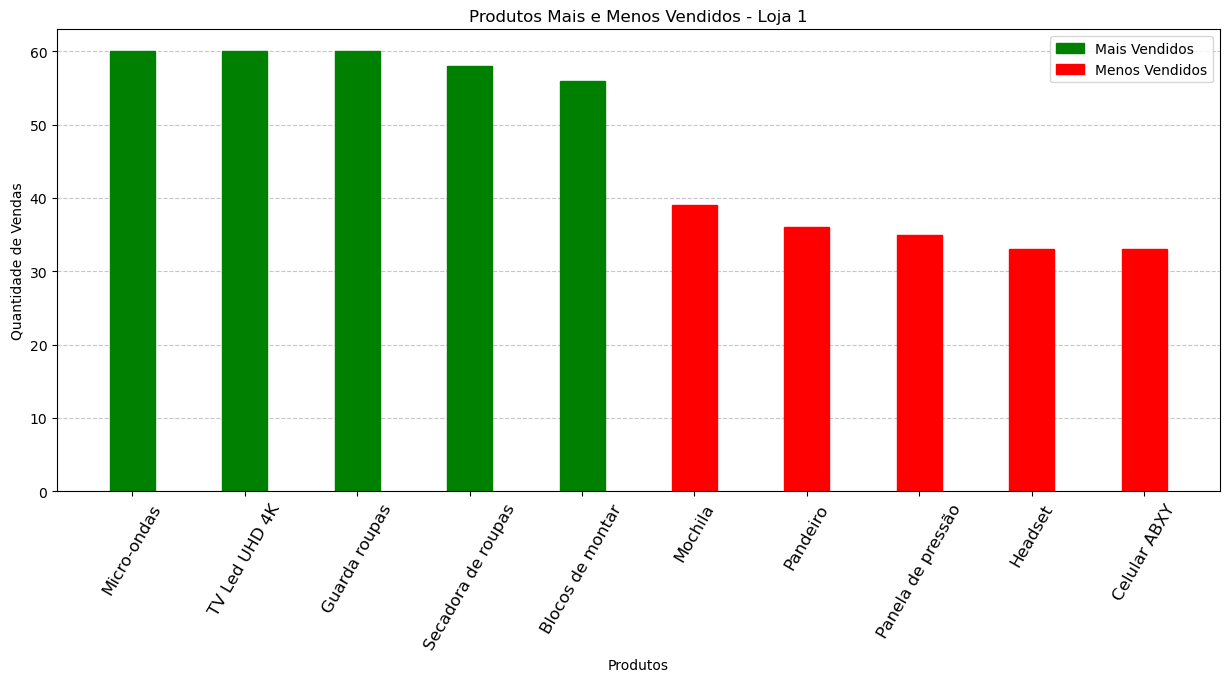

In [17]:
fig,ax1= plt.subplots(figsize=(15, 6))
p = ax1.bar(top_loja1[0],top_loja1[1], width=0.4, edgecolor='grey',zorder = 2)

for i in p:
  if i.get_height() > top_loja1[1][tam_top_1]:
    i.set_color('green')
  else:
    i.set_color('red')
p[0].set_label('Mais Vendidos')
p[-1].set_label('Menos Vendidos')
                
ax1.set_title('Produtos Mais e Menos Vendidos - Loja 1')
ax1.set_ylabel('Quantidade de Vendas')
ax1.set_xlabel('Produtos')
ax1.set_xticklabels(top_loja1[0],rotation=60,fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder= 0)

plt.show()

##### Loja 2

In [18]:
Produtos_2 = data_loja2['Produto'].unique()
vendas_prod_2 = {}

for i in Produtos_2:
  vendas_prod_2[i] = len(data_loja2[data_loja2['Produto'] == i])
vendas_prod_2= sorted(vendas_prod_2.items(),key=lambda x:x[1],reverse=True)

In [19]:
tam_top_2 = 5
top_loja2 =[[v[0] for v in vendas_prod_2[:tam_top_2]] + [v[0] for v in vendas_prod_2[-tam_top_2:]], [v[1] for v in vendas_prod_2[:tam_top_2]] + [v[1] for v in vendas_prod_2[-tam_top_2:]]]

/tmp/ipykernel_11835/2405252652.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_loja2[0],rotation=60,fontsize=12)


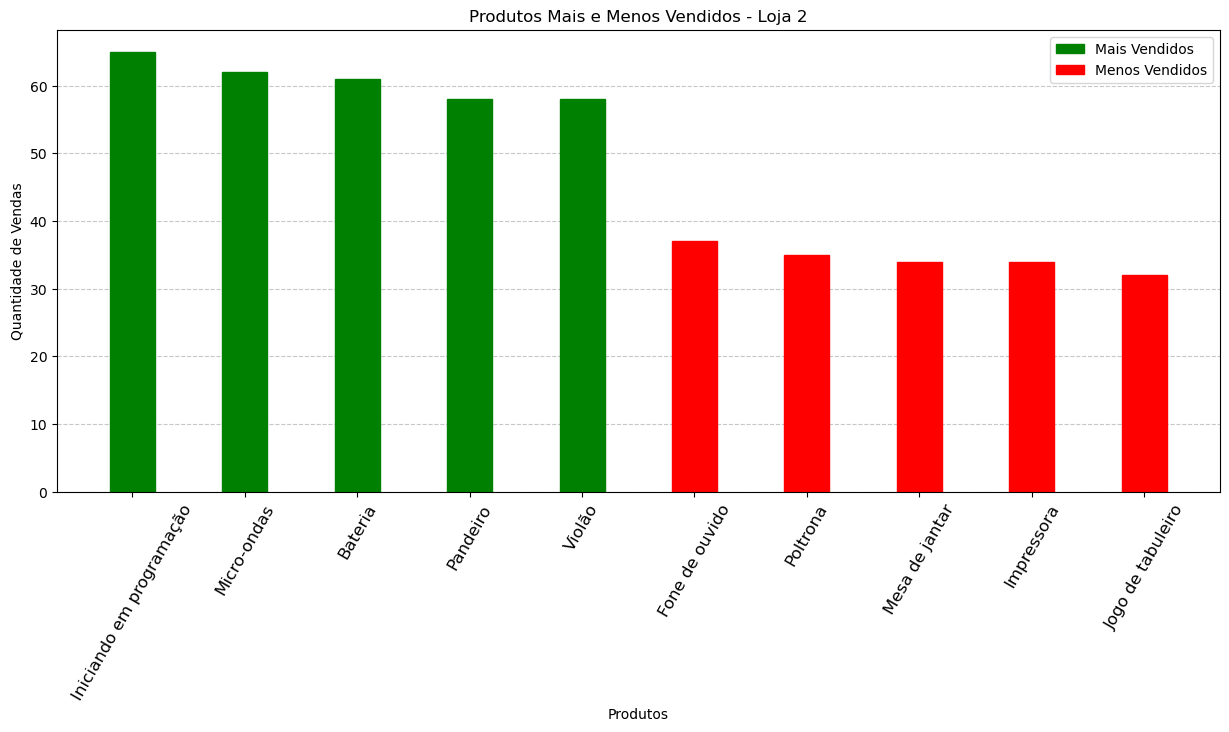

In [20]:
fig,ax1= plt.subplots(figsize=(15, 6))
p = ax1.bar(top_loja2[0],top_loja2[1], width=0.4, edgecolor='grey',zorder = 2)

for i in p:
  if i.get_height() > top_loja2[1][tam_top_1]:
    i.set_color('green')
  else:
    i.set_color('red')
p[0].set_label('Mais Vendidos')
p[-1].set_label('Menos Vendidos')
                
ax1.set_title('Produtos Mais e Menos Vendidos - Loja 2')
ax1.set_ylabel('Quantidade de Vendas')
ax1.set_xlabel('Produtos')
ax1.set_xticklabels(top_loja2[0],rotation=60,fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder= 0)

plt.show()

##### Loja 3

In [21]:
Produtos_3 = data_loja3['Produto'].unique()
vendas_prod_3 = {}

for i in Produtos_3:
  vendas_prod_3[i] = len(data_loja3[data_loja3['Produto'] == i])
vendas_prod_3= sorted(vendas_prod_3.items(),key=lambda x:x[1],reverse=True)

In [22]:
tam_top_3 = 5
top_loja3 =[[v[0] for v in vendas_prod_3[:tam_top_3]] + [v[0] for v in vendas_prod_3[-tam_top_3:]], [v[1] for v in vendas_prod_3[:tam_top_3]] + [v[1] for v in vendas_prod_3[-tam_top_3:]]]

/tmp/ipykernel_11835/2208965711.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_loja3[0],rotation=60,fontsize=12)


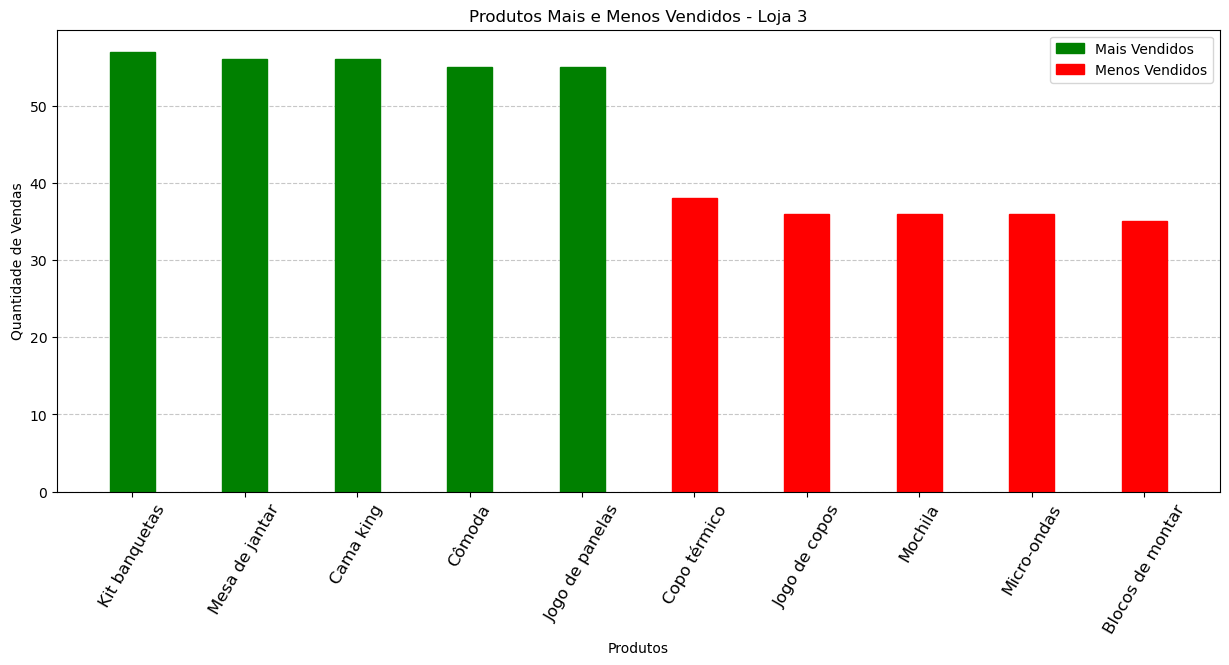

In [23]:
fig,ax1= plt.subplots(figsize=(15, 6))
p = ax1.bar(top_loja3[0],top_loja3[1], width=0.4, edgecolor='grey',zorder = 2)

for i in p:
  if i.get_height() > top_loja3[1][tam_top_1]:
    i.set_color('green')
  else:
    i.set_color('red')
p[0].set_label('Mais Vendidos')
p[-1].set_label('Menos Vendidos')
                
ax1.set_title('Produtos Mais e Menos Vendidos - Loja 3')
ax1.set_ylabel('Quantidade de Vendas')
ax1.set_xlabel('Produtos')
ax1.set_xticklabels(top_loja3[0],rotation=60,fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder= 0)

plt.show()

##### Loja 4

In [24]:
Produtos_4 = data_loja4['Produto'].unique()
vendas_prod_4 = {}

for i in Produtos_4:
  vendas_prod_4[i] = len(data_loja4[data_loja4['Produto'] == i])
vendas_prod_4= sorted(vendas_prod_4.items(),key=lambda x:x[1],reverse=True)

In [25]:
tam_top_4 = 5
top_loja4 =[[v[0] for v in vendas_prod_4[:tam_top_4]] + [v[0] for v in vendas_prod_4[-tam_top_4:]], [v[1] for v in vendas_prod_4[:tam_top_4]] + [v[1] for v in vendas_prod_4[-tam_top_4:]]]

/tmp/ipykernel_11835/3124143934.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_loja4[0],rotation=60,fontsize=12)


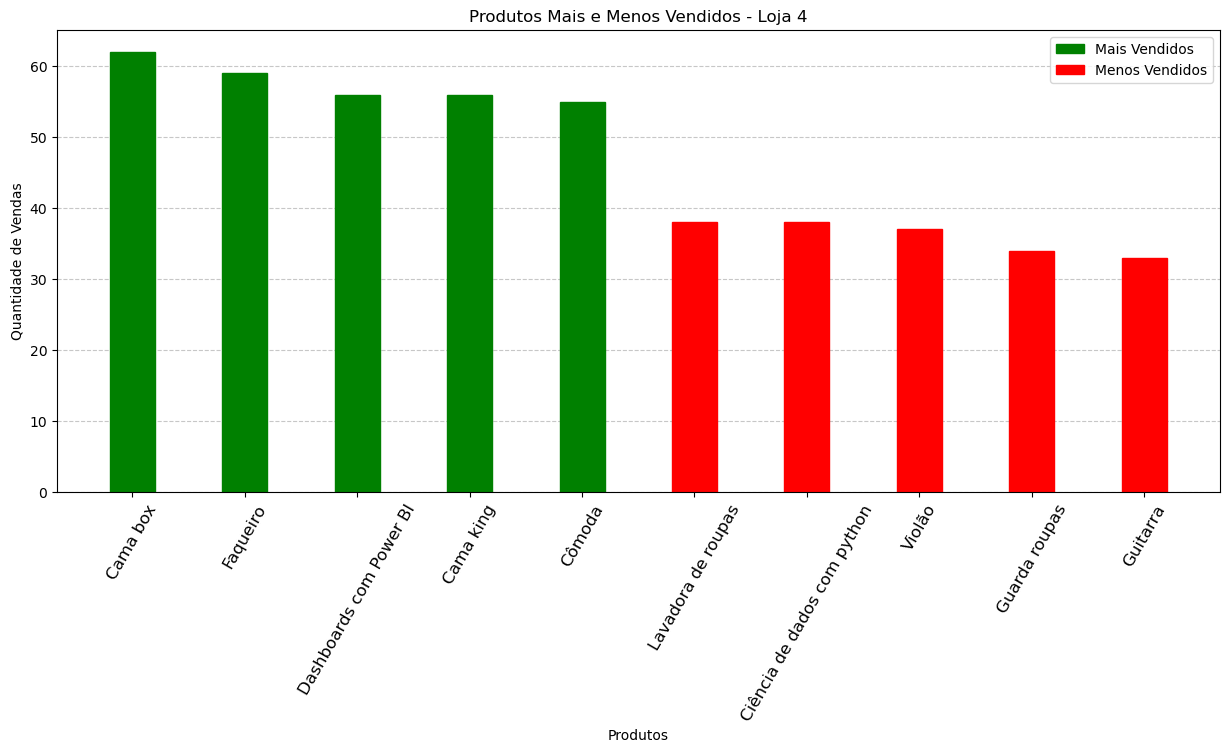

In [26]:
fig,ax1= plt.subplots(figsize=(15, 6))
p = ax1.bar(top_loja4[0],top_loja4[1], width=0.4, edgecolor='grey',zorder = 2)

for i in p:
  if i.get_height() > top_loja4[1][tam_top_1]:
    i.set_color('green')
  else:
    i.set_color('red')
p[0].set_label('Mais Vendidos')
p[-1].set_label('Menos Vendidos')
                
ax1.set_title('Produtos Mais e Menos Vendidos - Loja 4')
ax1.set_ylabel('Quantidade de Vendas')
ax1.set_xlabel('Produtos')
ax1.set_xticklabels(top_loja4[0],rotation=60,fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder= 0)

plt.show()

#### Frete Médio

In [39]:
fretes = []
fretes.append(data_loja1['Frete'].mean())
fretes.append(data_loja2['Frete'].mean())
fretes.append(data_loja3['Frete'].mean())
fretes.append(data_loja4['Frete'].mean())


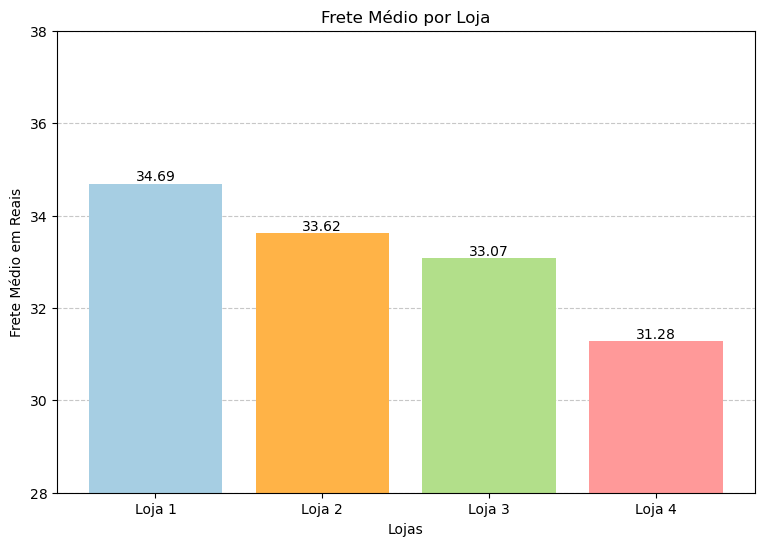

In [37]:
fig,ax = plt.subplots(figsize=(9, 6))
p = ax.bar(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], fretes, color=colors,zorder = 2)
ax.bar_label(p,label_type='edge', fontsize = 10, fmt = '%.2f')
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio em Reais')
plt.ylim(28,38)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder= 0)
plt.show()

#### Análise Geográfica

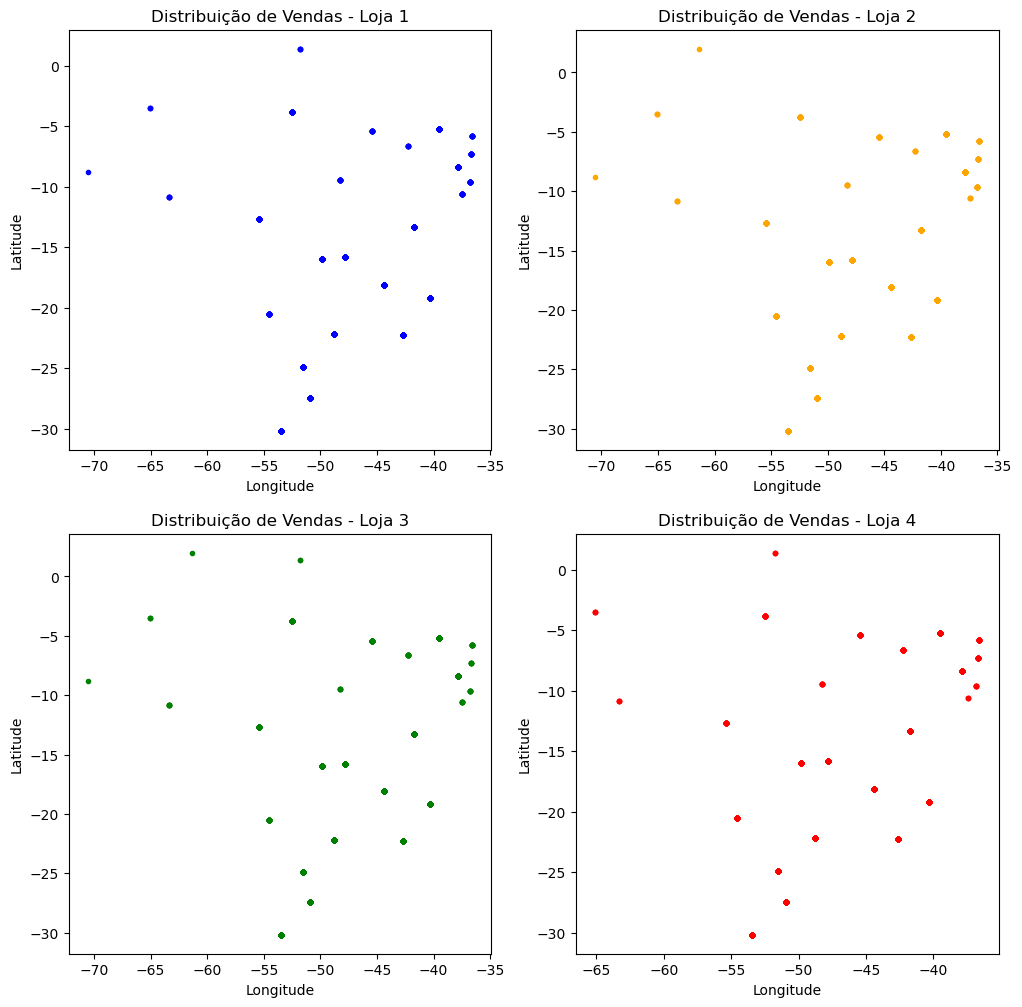

In [29]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12, 12))

axes[0][0].plot(data_loja1['lon'],data_loja1['lat'], 'o', color=colors[0], markersize=3)
axes[0][0].set_title('Distribuição de Vendas - Loja 1')
axes[0][0].set_xlabel('Longitude')
axes[0][0].set_ylabel('Latitude')

axes[0][1].plot(data_loja2['lon'],data_loja2['lat'], 'o', color=colors[1], markersize=3)
axes[0][1].set_title('Distribuição de Vendas - Loja 2')
axes[0][1].set_xlabel('Longitude')
axes[0][1].set_ylabel('Latitude')

axes[1][0].plot(data_loja3['lon'],data_loja3['lat'], 'o', color=colors[2], markersize=3)
axes[1][0].set_title('Distribuição de Vendas - Loja 3')
axes[1][0].set_xlabel('Longitude')
axes[1][0].set_ylabel('Latitude')

axes[1][1].plot(data_loja4['lon'],data_loja4['lat'], 'o', color=colors[3], markersize=3)
axes[1][1].set_title('Distribuição de Vendas - Loja 4')
axes[1][1].set_xlabel('Longitude')
axes[1][1].set_ylabel('Latitude')

plt.show()

### Relatório Final


#### 1. Faturamento Total
Nesta etapa, calculamos o faturamento total de cada loja somando os valores das vendas.

- **Resultados Positivos:**  
  - A Loja 1 obteve o maior faturamento, indicando bom desempenho em vendas.

- **Resultados Negativos:**  
  - A Loja 4 teve o menor faturamento, sugerindo oportunidades de melhoria em estratégias de vendas ou portfólio de produtos.

---

#### 2. Vendas por Categoria de Produto
Analisamos a quantidade de vendas por categoria em cada loja, utilizando gráficos de barras horizontais para visualização.

- **Resultados Positivos:**  
  - Todas as lojas tiveram destaque nas categorias "móveis" e "eletrônicos", mostrando forte demanda nesses segmentos.
  - A Loja 3 se destacou em "móveis", sendo a líder em vendas nesta categoria.

- **Resultados Negativos:**  
  - Categorias como "instrumentos musicais" e "utilidades domésticas" tiveram menor representatividade em todas as lojas.

---

#### 3. Número de Vendas Total por Categoria - Todas as Lojas
Realizamos uma comparação agrupada das vendas por categoria entre todas as lojas.

- **Resultados Positivos:**  
  - As categorias "móveis" e "eletrônicos" mantêm liderança em todas as lojas, mostrando consistência no portfólio.
  - A Loja 1 e Loja 3 se destacam em "móveis", enquanto Loja 1 lidera em "eletrônicos".

- **Resultados Negativos:**  
  - "Livros" e "instrumentos musicais" são categorias com menor volume de vendas em todas as lojas, indicando possível necessidade de revisão de estratégias para esses produtos.

---

#### 4. Satisfação Média com Atendimento
Avaliamos a satisfação dos clientes por loja, com base na média das avaliações das compras.

- **Resultados Positivos:**  
  - Todas as lojas apresentaram médias acima de 3.9, indicando bom nível de satisfação geral.
  - A Loja 3 obteve a maior média de satisfação, sugerindo excelência no atendimento.

- **Resultados Negativos:**  
  - A Loja 1 e 4 tiveram as menores média entre as lojas, embora ainda positiva, pode indicar pontos de melhoria no atendimento ao cliente.

---

#### 5. Frete Médio
Analisamos o custo médio de frete por loja.

- **Resultados Positivos:**  
  - A Loja 4 apresentou o menor frete médio, o que pode ser um diferencial competitivo.
  - As lojas 2 e 3 também mantêm fretes médios abaixo de 34 reais.

- **Resultados Negativos:**  
  - A Loja 1 possui o maior frete médio, o que pode impactar negativamente a experiência do cliente e a competitividade.

---

#### 6. Análise Geográfica
Visualizamos a distribuição geográfica das vendas de cada loja com base nas coordenadas de latitude e longitude.

- **Resultados Positivos:**  
  - Todas as lojas apresentam boa cobertura nacional, com vendas distribuídas em diferentes estados.
  - A Loja 1 e Loja 2 possuem maior concentração de vendas em regiões Sudeste e Sul.

- **Resultados Negativos:**  
  - Loja 4 apresentou menor presença em regiões Norte e Centro-Oeste.

---

#### 7. Decisão Final
Diante dos pontos positivos e negativos encontrados, recomendamos que o Sr. João **venda a loja 4**. 

A loja em questão se destacou negativamente em métricas de extrema importantância como faturamento e satisfação do cliente.

O seu desempenho em vendas na maioria das categorias de produtos se mostrou apenas regular ou abaixo, se destacando apenas nas vendas de briquendos. 

Além disso, a métrica em que se destaca positivamente, no caso o baixo valor de frete, provém em parte de sua incapacidade atual de atender uma região maior do país como as demais lojas.
